# Your name: <Enter your name>
## Assignment Name: CA01 - Data Cleaning and Exploration of India Air Quality

# Program Inititialization Section
## Enter your import packages here

In [1]:
# import packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

#I have imported all the packages I will need here.

# Data File Reading Section
## Write code to read in data from external sources here

In [30]:
#read datasets
df = pd.read_csv('data.csv', encoding='cp1252' )
df.head(1)

#In this initial step I have read the file into a pandas dataframe. I was having issues with reading the file and after
#searching stackoverflow I found this solution which involved encoding the data. After encoding the data I checked the first row to make sure everything looked good to go.

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01


# Initial Data Investigation Section

## Summarized details
### Generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values.
#### Steps:
#### 1. Statistical Description of data (data.describe)
#### 2. Display number of total rows and columns of the dataset (data.shape)
#### 3. Display number of non-null values for each column (data.count)
#### 4. Display number of null values for each column (sum of data.isnull)
#### 5. Display range, column, number of non-null objects of each column, datatype and memory usage (data.info)
#### 6. Display Top 10 and Bottom 10 records (head and tail)

In [25]:
df.describe()
#The describe method gives me some information about the rows and shows me that we have a varying amount of values for each column. This is
#likely due to null values.

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [6]:
df.shape
#We see here that we have 435,742 rows of data and 13 columns.

(435742, 13)

In [7]:
df.count()
#Again we can see disparities between how many values are within each column.

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [8]:
df.isnull().sum()
#Lots of null values are apparent here. We will address this in the future.

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [42]:
df.info()
#We see our date column is not in datetime format. We will fix that now.
df.date = pd.to_datetime(df.date)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   state     435735 non-null  object        
 1   location  435735 non-null  object        
 2   type      435735 non-null  object        
 3   so2       401092 non-null  float64       
 4   no2       419505 non-null  float64       
 5   rspm      395516 non-null  float64       
 6   spm       198355 non-null  float64       
 7   pm2_5     9314 non-null    float64       
 8   date      435735 non-null  datetime64[ns]
 9   year      435735 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [10]:
df.head(10)
#Our head and tail calls show us our data looks fine.

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
5,152,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.4,25.7,NaN,NaN,NaN,NaN,1990-03-01
6,150,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",5.4,17.1,NaN,NaN,NaN,NaN,1990-04-01
7,151,April - M041990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,8.7,NaN,NaN,NaN,NaN,1990-04-01
8,152,April - M041990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.2,23.0,NaN,NaN,NaN,NaN,1990-04-01
9,151,May - M051990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.0,8.9,NaN,NaN,NaN,NaN,1990-05-01


In [11]:
df.tail(10)

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435732,SAMP,09-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,145.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-09
435733,SAMP,12-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,34.0,61.0,161.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-12
435734,SAMP,15-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,44.0,148.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-15
435735,SAMP,18-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,17.0,44.0,131.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-18
435736,SAMP,21-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,18.0,45.0,140.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-21
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435741,NaN,NaN,Tripura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleansing the dataset
### Dropping of less valued columns:
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.

2. Dropping rows where no date is available.

In [36]:
# Cleaning up the data

#dropping columns that aren't required
df.drop(columns=['stn_code', 'sampling_date', 'agency', 'location_monitoring_station'], inplace=True)
#dropped columns that were not needed

# dropping rows where no date is available
#set dataframe equal to only the rows where there was a date available
df = df[df.date.notnull()]

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...
435734,West Bengal,ULUBERIA,RIRUO,20.0,44.0,148.0,NaN,NaN,2015-12-15
435735,West Bengal,ULUBERIA,RIRUO,17.0,44.0,131.0,NaN,NaN,2015-12-18
435736,West Bengal,ULUBERIA,RIRUO,18.0,45.0,140.0,NaN,NaN,2015-12-21
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN,2015-12-24


In [37]:
# displaying final columns (data.columns)

df.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

### Changing the types to uniform format:

Notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform. Replace the 'type' values with standard codes as follows:

types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}

data.type = data.type.replace(types)

In [38]:
#Used a replace command along with the provided dictionary to quickly replace all of the types with shorthand
types = { "Residential": "R", "Residential and others": "RO", "Residential, Rural and other Areas": "RRO", "Industrial Area": "I", "Industrial Areas": "I", "Industrial": "I", "Sensitive Area": "S", "Sensitive Areas": "S", "Sensitive": "S", np.nan: "RRO" }
df.type.replace(types, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [39]:
# Display top 10 records after codification of 'types'
df.head(10)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01
5,Andhra Pradesh,Hyderabad,RRO,6.4,25.7,NaN,NaN,NaN,1990-03-01
6,Andhra Pradesh,Hyderabad,RRO,5.4,17.1,NaN,NaN,NaN,1990-04-01
7,Andhra Pradesh,Hyderabad,I,4.7,8.7,NaN,NaN,NaN,1990-04-01
8,Andhra Pradesh,Hyderabad,RRO,4.2,23.0,NaN,NaN,NaN,1990-04-01
9,Andhra Pradesh,Hyderabad,I,4.0,8.9,NaN,NaN,NaN,1990-05-01


### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values. Convert the column to 'datetime' type and extract the year to populate the new column. Display Top 5 records after the conversion.

In [43]:
df['year'] = df.date.dt.year
df.head()
#created year column

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values

The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction.
We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [44]:
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5', 'year']

In [49]:
# define columns of importance, which shall be used reguarly (COLS = ....)
# invoke SimpleImputer to fill missing values using 'mean' as the replacement strategy
# Display data.info after the transformation
# Display that there are no more missing values in the dataset
mean_imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
df[cols] = mean_imputer.fit_transform(df[cols])
df.info()
len(df)
#same value for number of non nulls and the total length

0         True
1         True
2         True
3         True
4         True
          ... 
435734    True
435735    True
435736    True
435737    True
435738    True
Name: so2, Length: 435735, dtype: bool

In [69]:
df.head()
#Calling head to briefly check our fill method worked, it seems to be ok but our year is a float so we will fix that now.
df.year = df.year.astype(int)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## Statewise Grouping of so2, no2, rspm, spm values

Calculate median values of so2, no2, rspm, spm for each state and display in (a) as table (b) bar chart, with values sorted in ascending order. Separate section for each of the component. Use matplotlib().

### so2 status

In [87]:
so2_values = df.groupby('state').so2.median().sort_values()

Text(0.5, 1.0, 'Micrograms of SO2 in Indian states from 1990-2015')

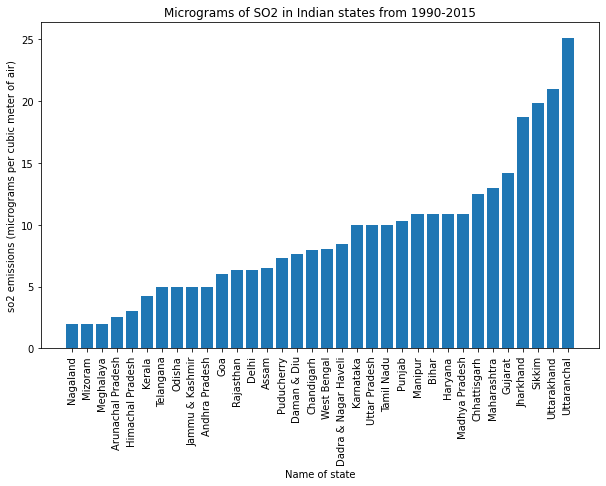

In [115]:
plt.bar(so2_values.index, so2_values)
plt.xticks(rotation=90)
plt.xlabel('Name of state')
plt.ylabel('so2 emissions (micrograms per cubic meter of air)')
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Micrograms of SO2 in Indian states from 1990-2015')

Uttaranchal has the highest concentration of so2 particles. There also seems to be a pretty rapid drop off as the states continue.


### no2 status

Text(0.5, 1.0, 'Micrograms of NO2 in Indian states from 1990-2015')

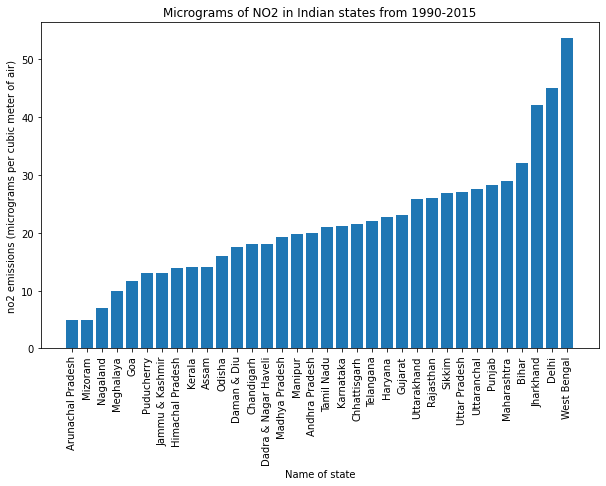

In [114]:
no2_values = df.groupby('state').no2.median().sort_values()
plt.bar(no2_values.index, no2_values)
plt.xticks(rotation=90)
plt.xlabel('Name of state')
plt.ylabel('no2 emissions (micrograms per cubic meter of air)')
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Micrograms of NO2 in Indian states from 1990-2015')

West Bengal has the highest concentration of no2 particles and follows a similar drop off to so2 pattern.


### rspm status

Text(0.5, 1.0, 'Micrograms of RSPM in Indian states from 1990-2015')

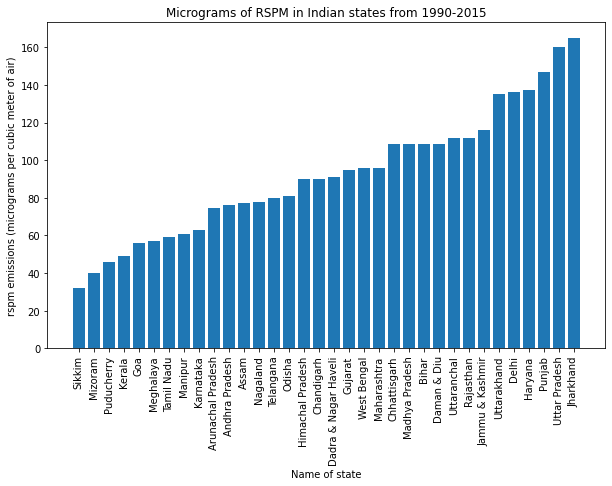

In [113]:
rspm_values = df.groupby('state').rspm.median().sort_values()
plt.bar(rspm_values.index, rspm_values)
plt.xticks(rotation=90)
plt.xlabel('Name of state')
plt.ylabel('rspm emissions (micrograms per cubic meter of air)')
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Micrograms of RSPM in Indian states from 1990-2015')

There is a more steady drop off of concentrations for rspm. Jharkhand holds the #1 position here.

### spm status

Text(0.5, 1.0, 'Micrograms of SPM in Indian states from 1990-2015')

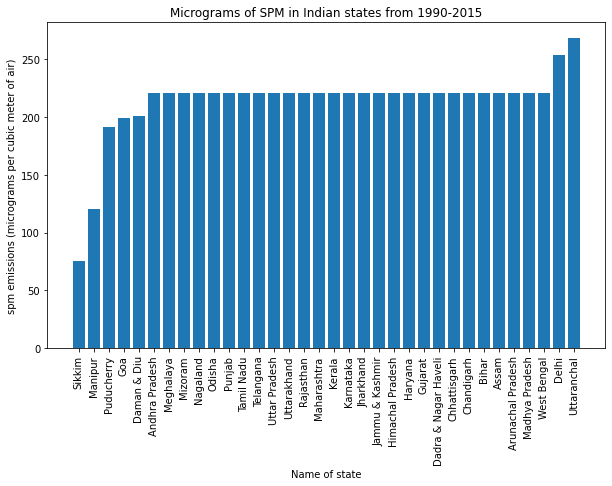

In [112]:
spm_values = df.groupby('state').spm.median().sort_values()
plt.bar(spm_values.index, spm_values)
plt.xticks(rotation=90)
plt.xlabel('Name of state')
plt.ylabel('spm emissions (micrograms per cubic meter of air)')
plt.rcParams["figure.figsize"] = (10, 6)
plt.title('Micrograms of SPM in Indian states from 1990-2015')

This data seems unplausible. It appears that we likely have no data for many of these regions and they were all assigned the median value as a result.


### What is the yearly trend in a particular state, say ‘Andhra Pradesh’?

Create a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’. Display top 5 records after.

In [82]:
new_df = df.loc[df.state == 'Andhra Pradesh'][['no2', 'so2', 'rspm', 'spm', 'year']].groupby('year')
new_df.head(5)

,no2,so2,rspm,spm,year
0,17.4,4.8,108.833091,220.78348,1990
1,7.0,3.1,108.833091,220.78348,1990
2,28.5,6.2,108.833091,220.78348,1990
3,14.7,6.3,108.833091,220.78348,1990
4,7.5,4.7,108.833091,220.78348,1990
...,...,...,...,...,...
23753,18.0,9.0,46.000000,220.78348,2015
23754,18.0,8.0,27.000000,220.78348,2015
23755,15.0,9.0,29.000000,220.78348,2015
23756,17.0,7.0,78.000000,220.78348,2015


In [105]:
so2 = new_df.so2.median()
so2
no2 = new_df.no2.median()
no2

year
1990    13.60
1991    12.80
1992    27.60
1993    11.40
1994    14.20
1995    26.30
1996    30.15
1997    28.40
1998    20.25
1999    17.05
2000    20.45
2001    24.00
2002    23.00
2004    32.00
2005    28.55
2006    30.30
2007    29.85
2008    26.40
2009    21.30
2010    13.00
2011    23.00
2012    13.00
2013    16.00
2014    18.00
2015    19.00
Name: no2, dtype: float64

Text(0.5, 1.0, 'Micrograms of SO2 and NO2 in Andhra Pradesh from 1990-2015')

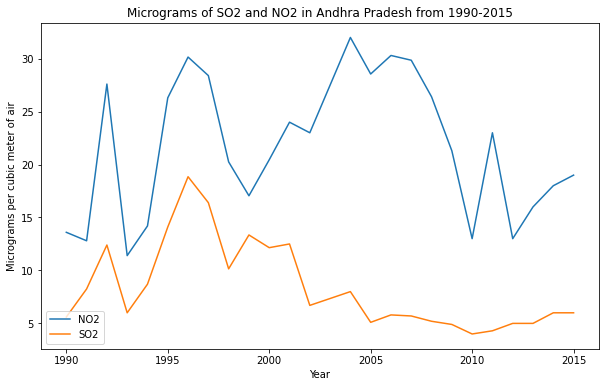

In [116]:
# Display yearly trend graph (year vs. value) in pairs: (a) so2 and no2 (b) rspm and spm. 
# So, you will display TWO graphs altogether.
plt.plot(no2.index, no2, label='NO2')
plt.plot(so2.index, so2, label='SO2')
plt.legend(loc='lower left')
plt.ylabel('Micrograms per cubic meter of air')
plt.xlabel('Year')
plt.title('Micrograms of SO2 and NO2 in Andhra Pradesh from 1990-2015')

In [107]:
spm = new_df.spm.median()
spm
rspm = new_df.rspm.median()
rspm

year
1990    108.833091
1991    108.833091
1992    108.833091
1993    108.833091
1994    108.833091
1995    108.833091
1996    108.833091
1997    108.833091
1998    108.833091
1999    108.833091
2000    108.833091
2001    108.833091
2002    108.833091
2004     85.150000
2005     77.000000
2006     88.000000
2007     85.000000
2008     81.500000
2009     80.000000
2010     67.000000
2011     74.000000
2012     73.000000
2013     67.000000
2014     70.000000
2015     69.000000
Name: rspm, dtype: float64

Text(0.5, 1.0, 'Micrograms of SPM and RSPM in Andhra Pradesh from 1990-2015')

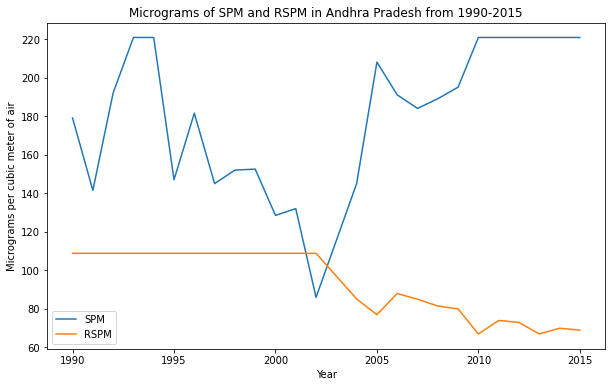

In [109]:
plt.plot(spm.index, spm, label='SPM')
plt.plot(rspm.index, rspm, label='RSPM')
plt.legend(loc='lower left')
plt.ylabel('Micrograms per cubic meter of air')
plt.xlabel('Year')
plt.title('Micrograms of SPM and RSPM in Andhra Pradesh from 1990-2015')

Do you find anything alarming? Explain what you can conclude from this Exploratory Data Analysis for the State of Andhra Pradesh. Enter your answer here .....



From my exploratory analysis, there are two main conclusions. Firstly, the recording of RSPM was quite poor in the past so we are unable to determine how the pattern was before the mid 2000's. This harms our ability to understand if we have increased or decreased our production of the substance. Furthermore, we can clearly see that our production of SPM has ramped up rapidly in the last 15 years. So, any neative connotations associated with SPM are likely to be exacerbated by this increase in concentration.
  With regards to the first graph, it seems that they have managed to get their SO2 levels under control but, NO2 is still volatile. We may want to look into ways that we can get implement strategies to reduce NO2 in a similar fashion to SO2. We could look at what policies lead to a decrease in SO2 levels and try to adapt them to NO2 situation.